In [1]:
%matplotlib inline                  
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np
from numpy import *
import time
import matplotlib.cm as cm
plt.rcParams.update({'font.size': 18})
from mpl_toolkits.axes_grid1 import make_axes_locatable
import statistics as stat
import warnings

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [2]:
start = '0'
end = '4'
folder = '.'

datageneral = np.loadtxt(r''+str(folder)+'/DataGeneral/DataGeneral'+str(start)+'.txt')
dt = datageneral[0]
pxtomum = datageneral[1]
offset = datageneral[2]
videosize = datageneral[3]
boundaryradius = pxtomum*400#datageneral[4]

R = 2.19e-6/2
T = 273.15+22
kB = 1.38064852e-23
eta=2.414e-5*10**(247.8/(T-140))
D_0 = kB*T/(6*np.pi*eta*R)
iterationtime = 51.9986
programtime = 12.8103745397

In [3]:
folder = './DataImportant'
folder2 = './DataRadial'
num = int(end)-int(start)+1
delaywave = np.zeros((num,2));anglewave = np.zeros(num)

data2 = np.loadtxt(r''+str(folder)+'/DataImportant'+str(start)+'.txt')
importantlength = len(data2)
allimportant = np.zeros((importantlength,num))

data4 = np.loadtxt(r''+str(folder2)+'/DataRadial'+str(start)+'.txt')
radialrows = len(data4[0,:])
radiallength = len(data4[:,0])
dataradial = np.zeros((radiallength,radialrows,num))

steps = 15
saveradial = np.zeros((steps,num))
for m in range(num):
    number = int(int(start)+m)
    data2 = np.loadtxt(r''+str(folder)+'/DataImportant'+str(number)+'.txt')
    #0 - mean distance         1 - paths  2 - angle change; 3 - inside; 4 - noise; 5 - delay; 6 - tau_r; 
    #7 - mean rho; 8 - tau_r 2; 9/10 - Drot/err; 11/12 - Drot2/err; 13/14 - ptime/err; 15/16 - rlength/err; 
    #17/18 - morein/out; 19 - maxv; 20 - meantime; 21 - meanprob
    data2 = np.asarray(data2)
    allimportant[:,m] = data2
    
    data4 = np.loadtxt(r''+str(folder2)+'/DataRadial'+str(number)+'.txt')
    dataradial[:,:,m] = data4
    

rows = 1; steps2 = 1; check = True
for i in range(1,num):
    if check == True:
        if allimportant[4,i] == allimportant[4,i-1]:
            steps2 += 1
    if allimportant[4,i] != allimportant[4,i-1]:
            check = False
            rows += 1
print('steps = ',steps2,' - rows = ',rows)

delaywave = np.zeros(num)
for i in range(num): delaywave[i] = iterationtime*1e-3*(allimportant[5,i]-1)+dt/2+videosize*1.9176e-6+(1032/27e6+1.9176e-6)*videosize+programtime*1e-3+1e-3*2       
timewave = np.zeros(num)
for i in range(num): timewave[i] = 51e-3*10000*i/(60*60)   

#for i in range(num): print('i = ',i+1,' - noise = ',allimportant[4,i],' - delay = ',allimportant[5,i])

steps =  1  - rows =  3


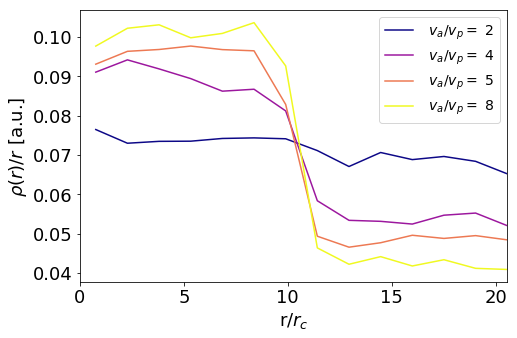

In [9]:
fig=plt.figure(1, figsize = (7.5,5) )
colorwave = cm.plasma(np.linspace(0, 1, num-1))
for i in range(num-1):
    plt.plot(dataradial[:,0,i],dataradial[:,3,i],color=colorwave[i], label = r' $v_{a}/v_{p} =$ '+str(int(allimportant[-1,i]/0.1)))
plt.xlabel('r/$r_{c}$')
plt.ylabel(r'$\rho(r)/r$ [a.u.]')
plt.xlim([0,dataradial[-1,0,i]])
plt.legend(fontsize = 14)
plt.tight_layout()
plt.savefig('Density for different tau2.pdf', format='pdf')
plt.show()

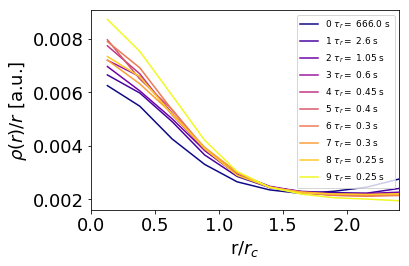

In [25]:
colorwave = cm.plasma(np.linspace(0, 1, num))
for i in range(num):
    plt.plot(dataradial[:,0,0],dataradial[:,7,i],color=colorwave[i], label = str(i)+r' $\tau_{r} =$ '+str(round(allimportant[6,i],2))+' s')
plt.xlabel('r/$r_{c}$')
plt.ylabel(r'$\rho(r)/r$ [a.u.]')
plt.xlim([0,dataradial[-1,0,0]])
plt.legend(fontsize = 9)
plt.tight_layout()
plt.savefig('Density for different tau.pdf', format='pdf')
plt.show()

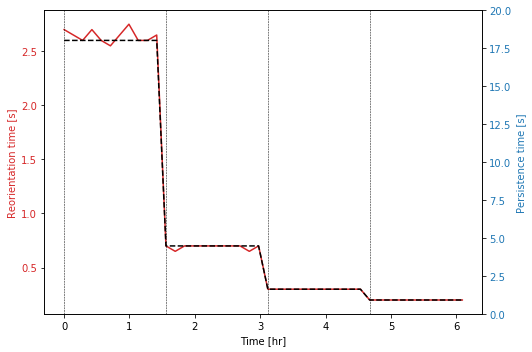

In [6]:
meandrot = np.zeros(num)
for i in range(rows):
    #meandrot[i*number:i*number+number] = stat.mode(1/np.sqrt(allimportant[6,i*number:i*number+number]))
    with warnings.catch_warnings():
        warnings.simplefilter("error")
        try: meandrot[i*steps:i*steps+steps] = stat.mode(allimportant[6,i*steps:i*steps+steps])
        except: meandrot[i*steps:i*steps+steps] = np.mean(allimportant[6,i*steps:i*steps+steps])

fig=plt.figure(1, figsize = (7.5,5) )
ax1 = plt.subplot(1,1,1)
color = 'tab:red'
ax1.set_xlabel('Time [hr]')
ax1.set_ylabel('Reorientation time [s]', color=color)
ax1.plot(timewave,allimportant[6,:], color=color)
for i in range(len(timewave)):
    if i % steps == 0:
        plt.axvline(x=timewave[i],linewidth=0.5, color = 'k',linestyle='--')
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(timewave,meandrot,c='k',linestyle='--')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Persistence time [s]', color=color)  # we already handled the x-label with ax1
ax2.plot(timewave,allimportant[14,:], color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.ylim([0,20])
plt.tight_layout()
plt.savefig('Drot.pdf', format='pdf')
plt.show()

delay =  2.12 s - noise =  10.0  - max delay =  1.0
delay =  2.12 s - noise =  20.0  - max delay =  1.0
delay =  2.12 s - noise =  30.0  - max delay =  1.0
delay =  2.12 s - noise =  40.0  - max delay =  1.0


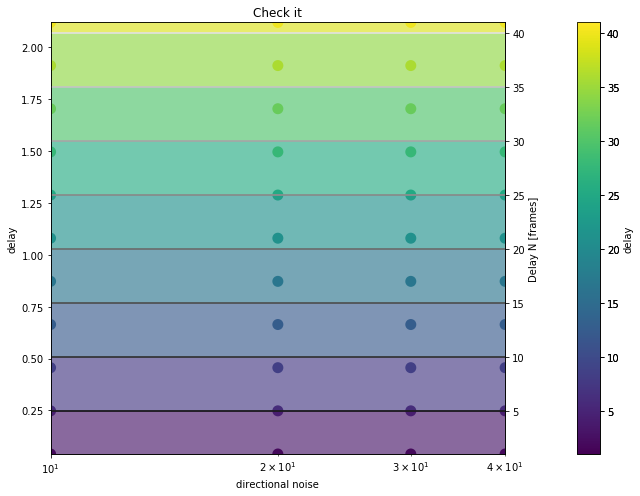

In [7]:
ix = allimportant[4,:]
idelayN = delaywave
idelay = allimportant[5,:]
ivin = allimportant[5,:]
istart = 0
iend = num
ixname = str('directional noise')
iyname = str('delay')
ivname = str('delay')
ititlename = str('Check it')
isavename = str('Test')
imaxor = True
plotit(ix,idelayN,idelay,ivin,istart,iend,ixname,iyname,ivname,ititlename,isavename,imaxor,border = False,dots = True,both = True,background=True,xaxislog = True)   

delay =  0.25 s - noise =  0.3  - min Mean of the prob. distr [µm] =  0.85


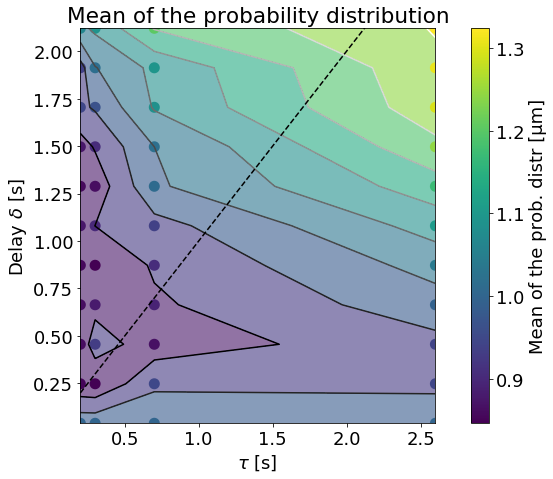

In [8]:
test = np.zeros(len(allimportant[7,:]))
numb = steps
for i in range(rows): 
    test[i*numb:numb*i+numb] = allimportant[7,i*numb:numb*i+numb]/allimportant[7,i*numb]

plotwave = np.zeros((len(allimportant[7,:]),3))
plotwave[:,0] = meandrot
plotwave[:,1] = delaywave
plotwave[:,2] = test#allimportant[7,:]#
if plotwave[-1,0] < plotwave[0,0]: 
    plotwave = plotwave[plotwave[:,1].argsort(kind='mergesort')]
    plotwave = plotwave[plotwave[:,0].argsort(kind='mergesort')]

ix = plotwave[:,0]#allimportant[4,start:end]#np.sqrt(1/allimportant[6,:])#
idelayN = plotwave[:,1]
idelay = allimportant[5,:]
ivin = plotwave[:,2]
istart = 0
iend = num
ixname = str(r'$\tau$ [s] ')
iyname = str(r'Delay $\delta$ [s]')
ivname = str('Mean of the prob. distr [µm]')
ititlename = str('Mean of the probability distribution')
isavename = str('Meanprobdistr2')
imaxor = False
plotit(ix,idelayN,idelay,ivin,istart,iend,ixname,iyname,ivname,ititlename,isavename,imaxor,border = False,dots = True,both = False,background=True,xaxislog = False)   

delay =  2.12 s - noise =  2.6  - min Density close to the center [a.u.] =  0.42


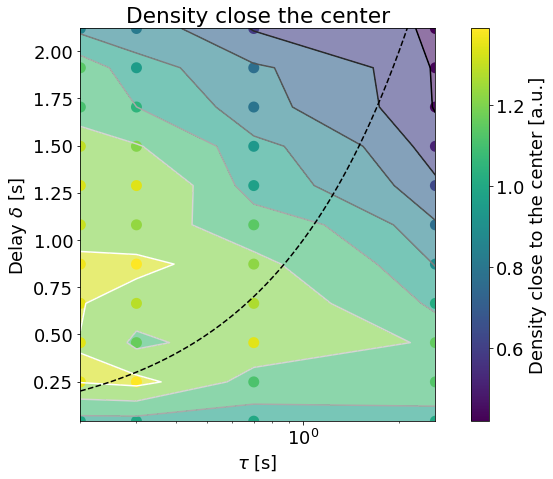

In [14]:
test2 = np.zeros(num)
numb = steps
where = 0
for i in range(rows): 
    value = dataradial[3*where,7,i*numb:numb*i+numb]+dataradial[3*where+1,7,i*numb:numb*i+numb]+dataradial[3*where+2,7,i*numb:numb*i+numb]
    test2[i*numb:numb*i+numb] = value/sum(dataradial[where*3:where*3+3,7,i*numb])#dataradial[0,7,i*numb]
    
test3 = np.zeros(num)
for i in range(num):
    test3[i] = sum(dataradial[0:2,7,i])

plotwave = np.zeros((len(allimportant[7,:]),3))
plotwave[:,0] = meandrot
plotwave[:,1] = delaywave
plotwave[:,2] = test2
if plotwave[-1,0] < plotwave[0,0]: 
    plotwave = plotwave[plotwave[:,1].argsort(kind='mergesort')]
    plotwave = plotwave[plotwave[:,0].argsort(kind='mergesort')]

ix = plotwave[:,0]#allimportant[4,start:end]#np.sqrt(1/allimportant[6,:])#
idelayN = plotwave[:,1]
idelay = allimportant[5,:]
ivin = plotwave[:,2]#test#
istart = 0
iend = num
ixname = str(r'$\tau$ [s] ')
iyname = str(r'Delay $\delta$ [s]')
ivname = str('Density close to the center [a.u.]')
ititlename = str('Density close the center')
isavename = str('Density at the center2')
imaxor = False
plotit(ix,idelayN,idelay,ivin,istart,iend,ixname,iyname,ivname,ititlename,isavename,imaxor,border = False,dots = True,both = False, background = True,xaxislog = True)   

TypeError: Input z must be at least a 2x2 array.

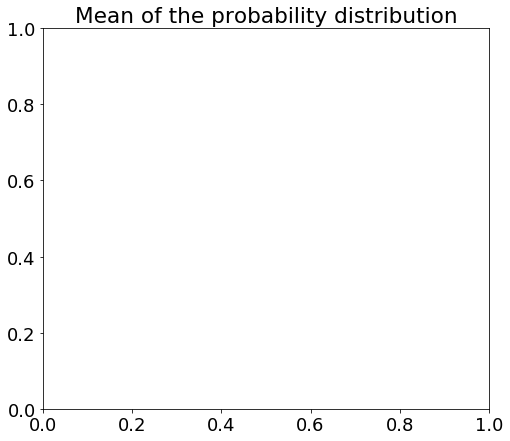

In [181]:
test = np.zeros(len(allimportant[7,:]))
numb = 10
for i in range(5): test[i*numb:numb**i+numb] = allimportant[7,i*numb:numb**i+numb]/allimportant[7,i*numb]

ix = meandrot#allimportant[4,start:end]#
idelayN = delaywave
idelay = allimportant[5,:]
ivin = allimportant[7,:]#test#
istart = 0
iend = num
ixname = str(r'$\tau^{-1/2}$ ')
iyname = str(r'Delay $\delta$ [s]')
ivname = str('Mean of the prob. distr [µm]')
ititlename = str('Mean of the probability distribution')
isavename = str('Meanprobdistr')
imaxor = False
plotit(ix,idelayN,idelay,ivin,istart,iend,ixname,iyname,ivname,ititlename,isavename,imaxor,border = False,dots = True,both = False,background=True)   

In [177]:
test2 = np.zeros(num)
numb = 11
for i in range(5): 
    value = dataradial[0,7,i*numb:numb**i+numb]+dataradial[1,7,i*numb:numb**i+numb]
    test2[i*numb:numb**i+numb] = value/sum(dataradial[0:2,7,i*numb])#dataradial[0,7,i*numb]
    
test3 = np.zeros(num)
for i in range(num):
    test3[i] = sum(dataradial[0:2,7,i])

ix = meandrot#allimportant[4,start:end]#
idelayN = delaywave
idelay = allimportant[5,:]
ivin = test2#test3#dataradial[0,7,:]#
istart = 0
iend = num
ixname = str(r'$\tau^{-1/2}$ ')
iyname = str(r'Delay $\delta$ [s]')
ivname = str('Mean of the prob. distr [µm]')
ititlename = str('Density close the center')
isavename = str('Density at the center')
imaxor = False
plotit(ix,idelayN,idelay,ivin,istart,iend,ixname,iyname,ivname,ititlename,isavename,imaxor,border = False,dots = True,both = False, background = True)   

IndexError: index 44 is out of bounds for axis 2 with size 44

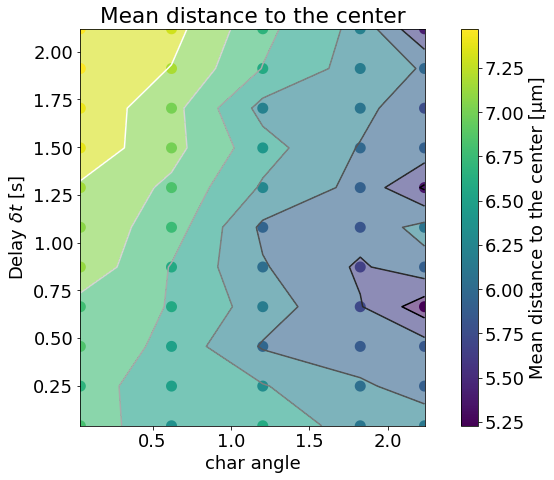

delay =  0.66 s - noise =  2.24  - min Mean distance to the center [µm] =  5.23


In [17]:
ix = meandrot#allimportant[4,start:end]#
idelayN = delaywave
idelay = allimportant[5,:]
ivin = allimportant[0,:]
istart = 0
iend = num
ixname = str('char angle')
ivname = str('Mean distance to the center [µm]')
ititlename = str('Mean distance to the center')
isavename = str('Meandistance')
imaxor = False
plotit(ix,idelayN,idelay,ivin,istart,iend,ixname,ivname,ititlename,isavename,imaxor,border = False,dots = True,both = False)   

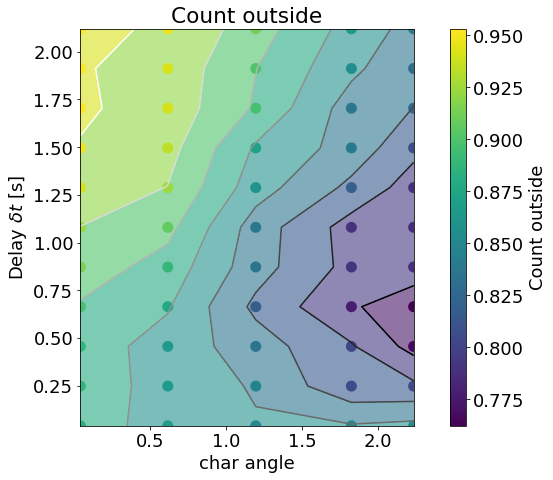

delay =  0.66 s - noise =  2.24  - min Count outside =  0.76


In [17]:
ix = meandrot#allimportant[4,start:end]#
idelayN = delaywave
idelay = allimportant[5,:]
ivin = 1-allimportant[3,:]
istart = 0
iend = num
ixname = str('char angle')
ivname = str('Count outside')
ititlename = str('Count outside')
isavename = str('Count outside')
imaxor = False
plotit(ix,idelayN,idelay,ivin,istart,iend,ixname,ivname,ititlename,isavename,imaxor,border = False,dots = True,both = False)   

/Users/alex/anaconda/lib/python3.5/site-packages/numpy/ma/core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")
/Users/alex/anaconda/lib/python3.5/site-packages/matplotlib/contour.py:1176: RuntimeWarning: invalid value encountered in greater
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
/Users/alex/anaconda/lib/python3.5/site-packages/matplotlib/contour.py:1176: RuntimeWarning: invalid value encountered in less
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
/Users/alex/anaconda/lib/python3.5/site-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


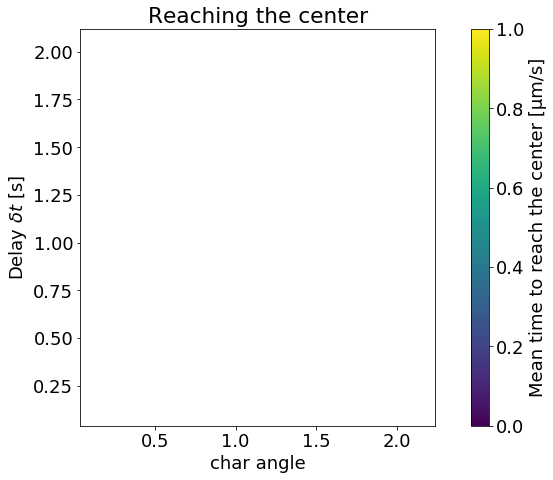

In [18]:
ix = meandrot#allimportant[4,start:end]#
idelayN = delaywave
idelay = allimportant[5,:]
ivin = allimportant[20,:]
istart = 0
iend = num
ixname = str('char angle')
ivname = str('Mean time to reach the center [µm/s]')
ititlename = str('Reaching the center')
isavename = str('Time reaching the center')
imaxor = False
plotit(ix,idelayN,idelay,ivin,istart,iend,ixname,ivname,ititlename,isavename,imaxor,border = False,dots = True,both = False)   

/Users/alex/anaconda/lib/python3.5/site-packages/numpy/ma/core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")
/Users/alex/anaconda/lib/python3.5/site-packages/matplotlib/contour.py:1176: RuntimeWarning: invalid value encountered in greater
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
/Users/alex/anaconda/lib/python3.5/site-packages/matplotlib/contour.py:1176: RuntimeWarning: invalid value encountered in less
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
/Users/alex/anaconda/lib/python3.5/site-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


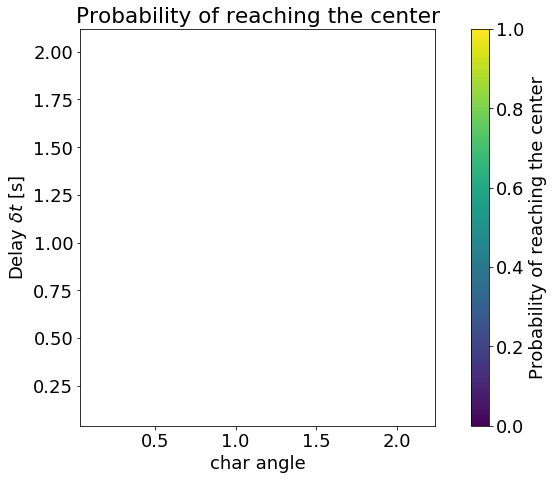

In [19]:
ix = meandrot#allimportant[4,start:end]#
idelayN = delaywave
idelay = allimportant[5,:]
ivin = allimportant[21,:]
istart = 0
iend = num
ixname = str('char angle')
ivname = str('Probability of reaching the center')
ititlename = str('Probability of reaching the center')
isavename = str('Probability reaching the center')
imaxor = True
plotit(ix,idelayN,idelay,ivin,istart,iend,ixname,ivname,ititlename,isavename,imaxor,border = False,dots = True,both = False)   

/Users/alex/anaconda/lib/python3.5/site-packages/numpy/ma/core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")
/Users/alex/anaconda/lib/python3.5/site-packages/matplotlib/contour.py:1176: RuntimeWarning: invalid value encountered in greater
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
/Users/alex/anaconda/lib/python3.5/site-packages/matplotlib/contour.py:1176: RuntimeWarning: invalid value encountered in less
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
/Users/alex/anaconda/lib/python3.5/site-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


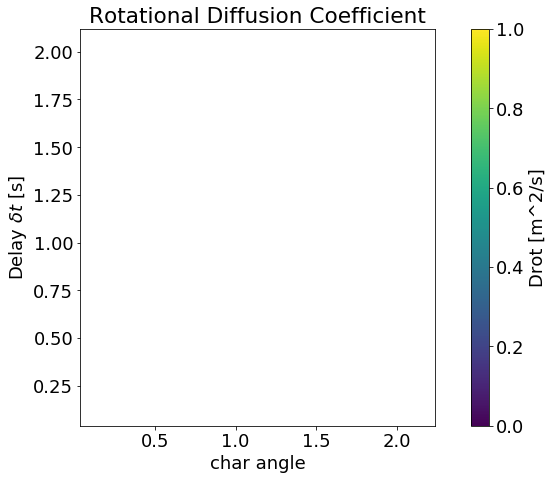

In [20]:
#0 - mean distance to center, 1 - boundary hits, 2 - mean angle change, 3 - countin, 4 - noise, 5 - delay, 
#6 - reorientation time, 7 - mean of the propability, 8 - sd density, 9/10 - Drot/err, 11/12 - Drotexp/err, 
#13/14 - ptime/err, 15/16 - plength/err, 17/18 - radialdistmore in/out - 19 - Vaverage
ix = meandrot#allimportant[4,start:end]#
idelayN = delaywave
idelay = allimportant[5,:]
ivin = allimportant[9,:]
istart = 0
iend = num
ixname = str('char angle')
ivname = str('Drot [m^2/s]')
ititlename = str('Rotational Diffusion Coefficient')
isavename = str('Rotational Diffusion Coefficient')
imaxor = True
plotit(ix,idelayN,idelay,ivin,istart,iend,ixname,ivname,ititlename,isavename,imaxor,border = False,dots = True,both = False)   

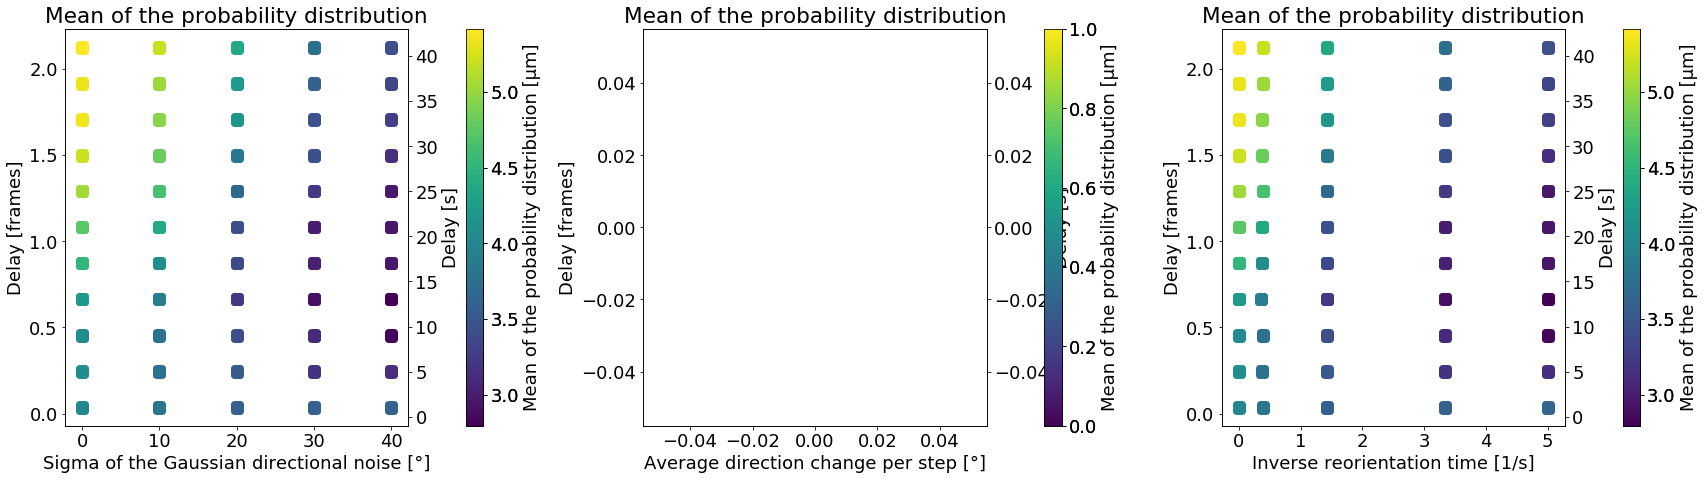

delay =  0.664241906661  - noise =  0.0  - min distance =  0.2912442052


In [21]:
start = 0
x1 = allimportant[2,start:]
x2 = allimportant[4,start:]#
x3 = 1/allimportant[6,start:]
y = delaywave[start:]
y2 = allimportant[5,start:]
v = allimportant[7,start:]

xwave = [x2,x1,x3]
fig, ax1 = plt.subplots(figsize=(24,7))
for i in range(3):
    x = xwave[i]
    ax = plt.subplot(1,3,i+1)
    im = ax.scatter(x,y,c=v,linewidths=7,marker='s')
    if i == 0: ax.set_xlabel('Sigma of the Gaussian directional noise [°]')
    if i == 1: ax.set_xlabel('Average direction change per step [°]')
    if i == 2: ax.set_xlabel('Inverse reorientation time [1/s]')
    ax.set_ylabel('Delay [frames]')
    ax.tick_params(axis='y')
    ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
    im2 = ax2.scatter(x,y2,c=v,linewidths=7,marker='s')
    ax2.set_ylabel('Delay [s]')  # we already handled the x-label with ax1
    ax2.tick_params(axis='y')
    plt.title('Mean of the probability distribution')

    divider = make_axes_locatable(ax)
    divider2 = make_axes_locatable(ax2)
    cax = divider.append_axes("right", size="5%", pad=0.8)
    cax2 = divider2.append_axes("right", size="5%", pad=0.8)

    plt.colorbar(im, cax=cax)
    plt.colorbar(im2, cax=cax2)
    plt.ylabel('Mean of the probability distribution [µm]')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('oldMeanprobdist.pdf', format='pdf')
plt.show()

for i in range(num):
    if allimportant[0,i] == min(allimportant[0,:]):        
        print('delay = ',delaywave[i],' - noise = ',anglewave[i],' - min distance = ',min(allimportant[0,:])*pxtomum)

In [32]:
anglenoise = [0,15,20,25,40]
optmeandistdelay = [22,10,16,19,4]
optmeandistvalue = [5.95,4.14,3.5,3.65,4.54]
optvelodiffdelay = [22,16,10,19,4]
optvelodiffvalue = [1.3,0.9,0.71,0.70,0.52]

anglenoise2 = [0,5,10,15,20]
optmeandistdelay2 = [19,3,7,9,25]
optmeandistvalue2 = [6.6,5.57,5.54,5.44,4.46]
optvelodiffdelay2 = [22,17,14,16,8]
optvelodiffvalue2 = [1.47,1.22,0.88,0.61,0.48]

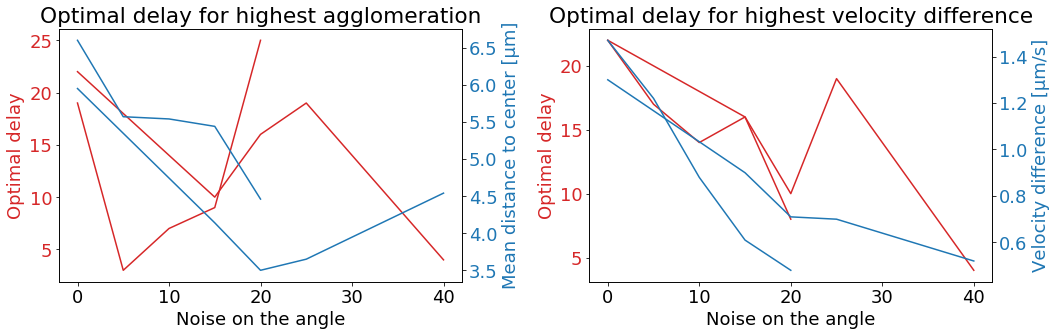

In [33]:
# Create some mock data
fig, ax = plt.subplots(figsize = (15,5))

ax1 = plt.subplot(1,2,1)
color = 'tab:red'
plt.title('Optimal delay for highest agglomeration')
ax1.set_xlabel('Noise on the angle')
ax1.set_ylabel('Optimal delay', color=color)
ax1.plot(anglenoise,optmeandistdelay, color=color, label = '#1')
ax1.plot(anglenoise2,optmeandistdelay2, color=color, label = '#2')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Mean distance to center [µm]', color=color)  # we already handled the x-label with ax1
ax2.plot(anglenoise,optmeandistvalue, color=color, label = '#1')
ax2.plot(anglenoise2,optmeandistvalue2, color=color, label = '#2')
ax2.tick_params(axis='y', labelcolor=color)

ax1 = plt.subplot(1,2,2)
color = 'tab:red'
plt.title('Optimal delay for highest velocity difference')
ax1.set_xlabel('Noise on the angle')
ax1.set_ylabel('Optimal delay', color=color)
ax1.plot(anglenoise,optvelodiffdelay, color=color)
ax1.plot(anglenoise2,optvelodiffdelay2, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Velocity difference [µm/s]', color=color)  # we already handled the x-label with ax1
ax2.plot(anglenoise,optvelodiffvalue, color=color)
ax2.plot(anglenoise2,optvelodiffvalue2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('Optimal delay all.pdf', format='pdf')
plt.show()

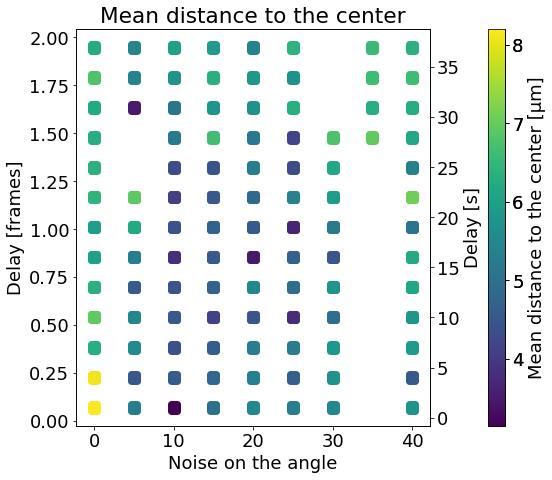

delay =  0.0734563123175  - noise =  0.0  - min distance =  0.1679087514


In [116]:
x = allimportant[4,start:end]
y = delaywave
y2 = allimportant[5,:]
v = allimportant[0,:]

fig, ax1 = plt.subplots(figsize=(8,7))
ax = plt.subplot(111)
im = ax.scatter(x,y,c=v,linewidths=7,marker='s')
ax.set_xlabel('Noise on the angle')
ax.set_ylabel('Delay [frames]')
ax.tick_params(axis='y')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
im2 = ax2.scatter(x,y2,c=v,linewidths=7,marker='s')
ax2.set_ylabel('Delay [s]')  # we already handled the x-label with ax1
ax2.tick_params(axis='y')
plt.title('Mean distance to the center')

divider = make_axes_locatable(ax)
divider2 = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.8)
cax2 = divider2.append_axes("right", size="5%", pad=0.8)

plt.colorbar(im, cax=cax)
plt.colorbar(im2, cax=cax2)
plt.ylabel('Mean distance to the center [µm]')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('Mean distance to the center.pdf', format='pdf')
plt.show()

for i in range(num):
    if allimportant[0,i] == min(allimportant[0,:]):        
        print('delay = ',delaywave[i],' - noise = ',anglewave[i],' - min distance = ',min(allimportant[0,:])*pxtomum)

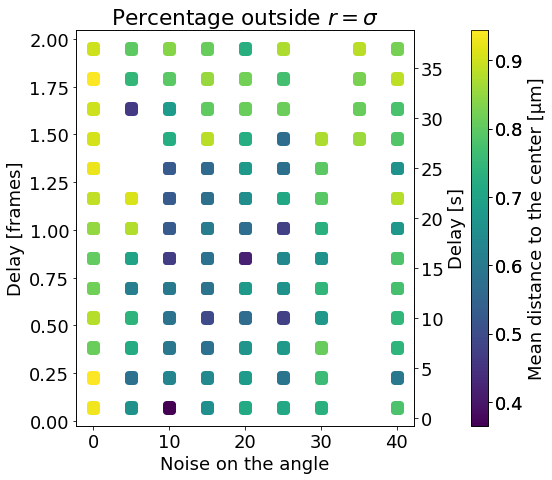

delay =  0.0734563123175  - noise =  0.0  - min percentage =  0.365


In [117]:
x = allimportant[4,start:end]
y = delaywave
y2 = allimportant[5,:]
v = 1-allimportant[3,:]

fig, ax1 = plt.subplots(figsize=(8,7))
ax = plt.subplot(111)
im = ax.scatter(x,y,c=v,linewidths=7,marker='s')
ax.set_xlabel('Noise on the angle')
ax.set_ylabel('Delay [frames]')
ax.tick_params(axis='y')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
im2 = ax2.scatter(x,y2,c=v,linewidths=7,marker='s')
ax2.set_ylabel('Delay [s]')  # we already handled the x-label with ax1
ax2.tick_params(axis='y')
plt.title('Percentage outside $r = \sigma$')

divider = make_axes_locatable(ax)
divider2 = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.8)
cax2 = divider2.append_axes("right", size="5%", pad=0.8)

plt.colorbar(im, cax=cax)
plt.colorbar(im2, cax=cax2)
plt.ylabel('Mean distance to the center [µm]')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('Percentage outside.pdf', format='pdf')
plt.show()

for i in range(num):
    if allimportant[3,i] == max(allimportant[3,:]):        
        print('delay = ',delaywave[i],' - noise = ',anglewave[i],' - min percentage = ',1-max(allimportant[3,:]))

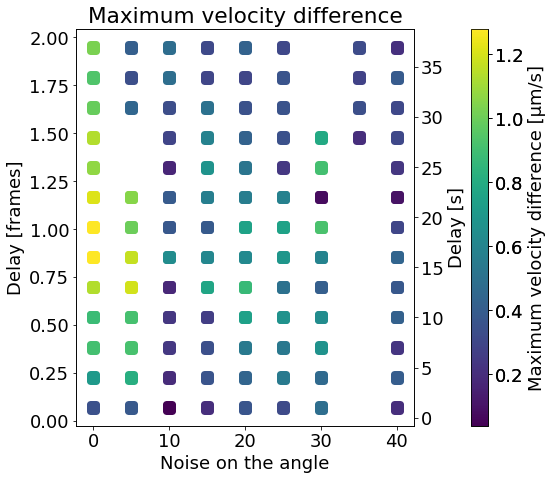

delay =  0.0734563123175  - noise =  0.0  - min percentage =  0.365


In [121]:
x = allimportant[4,start:end]
y = delaywave
y2 = allimportant[5,:]
v = allimportant[23,:]

fig, ax1 = plt.subplots(figsize=(8,7))
ax = plt.subplot(111)
im = ax.scatter(x,y,c=v,linewidths=7,marker='s')
ax.set_xlabel('Noise on the angle')
ax.set_ylabel('Delay [frames]')
ax.tick_params(axis='y')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
im2 = ax2.scatter(x,y2,c=v,linewidths=7,marker='s')
ax2.set_ylabel('Delay [s]')  # we already handled the x-label with ax1
ax2.tick_params(axis='y')
plt.title('Maximum velocity difference')

divider = make_axes_locatable(ax)
divider2 = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.8)
cax2 = divider2.append_axes("right", size="5%", pad=0.8)

plt.colorbar(im, cax=cax)
plt.colorbar(im2, cax=cax2)
plt.ylabel('Maximum velocity difference [µm/s]')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('Vdiff.pdf', format='pdf')
plt.show()

for i in range(num):
    if allimportant[3,i] == max(allimportant[3,:]):        
        print('delay = ',delaywave[i],' - noise = ',anglewave[i],' - min percentage = ',1-max(allimportant[3,:]))

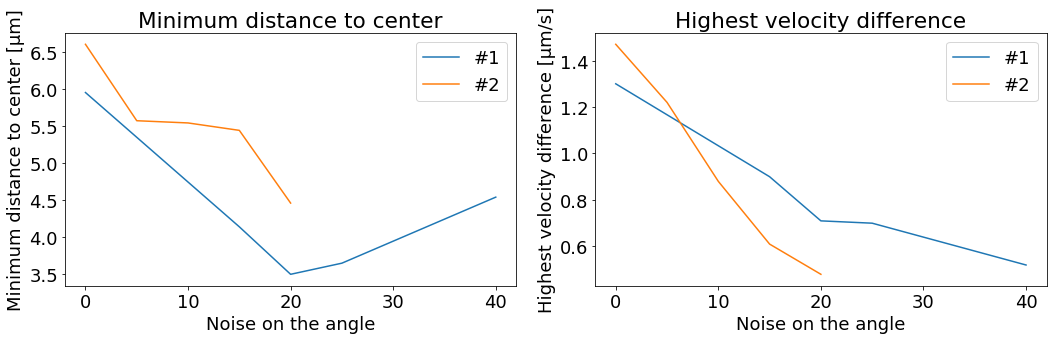

In [37]:
# Create some mock data
fig, ax = plt.subplots(figsize = (15,5))

ax1 = plt.subplot(1,2,1)
plt.plot(anglenoise,optmeandistvalue, label = '#1')
plt.plot(anglenoise2,optmeandistvalue2, label = '#2')
plt.title('Minimum distance to center')
plt.xlabel('Noise on the angle')
plt.ylabel('Minimum distance to center [µm]')
plt.legend()

ax1 = plt.subplot(1,2,2)
plt.plot(anglenoise,optvelodiffvalue, label = '#1')
plt.plot(anglenoise2,optvelodiffvalue2, label = '#2')
plt.title('Highest velocity difference')
plt.xlabel('Noise on the angle')
plt.ylabel('Highest velocity difference [µm/s]')
plt.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('Optimal delay all.pdf', format='pdf')
plt.show()